In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
x_train.shape
x_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(10000, 28, 28)

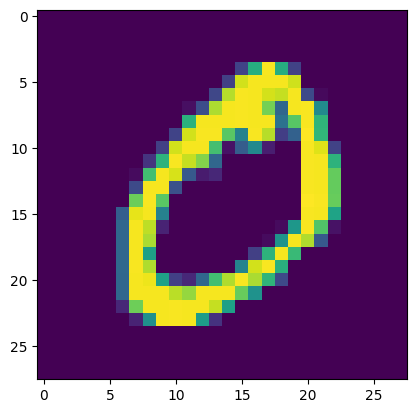

In [4]:
plt.imshow(x_train[1])
plt.show()

In [5]:
from tensorflow.keras import layers
def model():
  #input=tf.keras.Input((28,28,1))
  img=layers.Rescaling(1/255,input_shape=(28,28,1))
  c1=layers.Conv2D(12,kernel_size=5,strides=1,padding='SAME',activation='relu') #Before padding shape was --(1,26,26,6)
  s2=layers.MaxPool2D(pool_size=2)
  c3=layers.Conv2D(32,kernel_size=5,strides=1,padding='valid',activation='relu')
  s4=layers.MaxPool2D(pool_size=2)
  c5=layers.Conv2D(240,kernel_size=5,strides=1,padding='valid',activation='relu')
  #here pool filter will be 2 x 2 if we want 4X4 output  #c5 is a convolution layer
  flat_layer=layers.Flatten() #we are using flatten to reduce
  f6=layers.Dense(128,activation='relu')
  op=layers.Dense(10,activation='softmax')
  cnn=tf.keras.Sequential([
      img,c1,s2,c3,s4,c5,flat_layer,f6,op
  ])
  cnn.compile(loss='SparseCategoricalCrossentropy',optimizer='adam',metrics=['accuracy'])
  return cnn

lenet5=model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
lenet5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 12)          │             312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 32)          │           9,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 240)           │         192,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 240)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          30,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 234,322 (915.32 KB)

 Trainable params: 234,322 (915.32 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
cbck=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',patience=5,restore_best_weights=1)
history = lenet5.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test),callbacks=[cbck])

Epoch 1/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.9038 - loss: 0.3047 - val_accuracy: 0.9888 - val_loss: 0.0369
Epoch 2/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.9857 - loss: 0.0456 - val_accuracy: 0.9892 - val_loss: 0.0349
Epoch 3/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9907 - loss: 0.0305 - val_accuracy: 0.9878 - val_loss: 0.0377
Epoch 4/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9922 - loss: 0.0247 - val_accuracy: 0.9885 - val_loss: 0.0358
Epoch 5/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9940 - loss: 0.0191 - val_accuracy: 0.9914 - val_loss: 0.0270
Epoch 6/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9953 - loss: 0.0147 - val_accuracy: 0.9895 - val_loss: 0.0364
Epoch 7/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9961 - loss: 0.0131 - val_accuracy: 0.9909 - val_loss: 0.0376
Epoch 8/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - ac

In [8]:
lenet5.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9884 - loss: 0.0513


[0.03887519985437393, 0.9915000200271606]

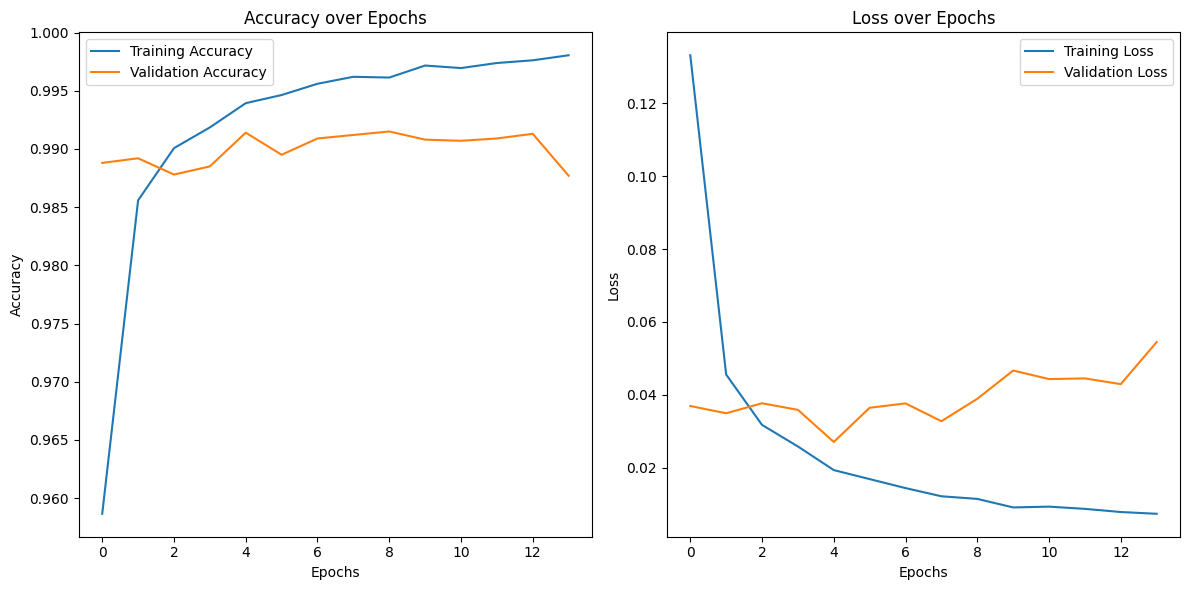

In [9]:
# Plot Accuracy and Loss
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
files.download('lenet5.h5')